## Machine Learning: Python
## Unsupervised Analysis Project
### Team 14
Ela Yenikoylu, Kazuki Takahashi, Lavini Raj, Valentin Voelckel

#### Importing our survey data and necessary packages

In [1]:
# Import packages
import pandas                  as pd
import matplotlib.pyplot       as plt                  
import seaborn                 as sns          
import numpy                   as np
from   sklearn.preprocessing   import StandardScaler 
from   sklearn.decomposition   import PCA            
from   scipy.cluster.hierarchy import dendrogram, linkage 
from   sklearn.cluster         import KMeans              

# Load the data
file      = "./survey_data.xlsx"
survey_df = pd.read_excel(file)

# Setting print options
pd.set_option('display.max_rows',     500)
pd.set_option('display.max_columns',  500)
pd.set_option('display.width',       1000)
pd.set_option('display.max_colwidth', 100)

#### Functions Needed for the Analysis

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()
    
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()



#### Taking a look at the head of our data

In [3]:
survey_df.head()

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,10000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,10001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,10002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,10003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,10004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


#### Exploring our data more

In [4]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 79 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   surveyID                                                                      137 non-null    int64 
 1   Am the life of the party                                                      137 non-null    int64 
 2   Feel little concern for others                                                137 non-null    int64 
 3   Am always prepared                                                            137 non-null    int64 
 4   Get stressed out easily                                                       137 non-null    int64 
 5   Have a rich vocabulary                                                        137 non-null    int64 
 6   Don't talk a lot                          

#### Summary Statistics

In [5]:
survey_df.describe().round(2)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,10068.00,3.01,2.78,3.55,2.89,3.35,2.88,3.85,2.41,3.28,2.33,3.66,1.70,4.12,3.55,3.96,3.09,4.09,2.31,2.96,2.12,3.39,2.50,3.34,2.62,3.88,2.64,3.67,2.34,2.43,2.20,2.98,2.30,3.82,2.77,3.92,3.22,3.66,2.31,2.46,2.75,2.99,3.89,3.80,2.56,3.94,3.45,3.86,3.81,2.44,3.84,4.02,2.39,4.04,4.15,4.00,3.91,4.02,4.08,3.96,4.03,4.01,2.79,4.14,4.24,3.93,2.58,3.93,3.93,4.09,3.76,4.22,27.23
std,39.69,1.14,1.33,0.92,1.22,0.95,1.09,0.98,1.36,1.10,1.10,1.00,0.93,0.80,1.18,0.95,0.95,0.86,1.10,1.03,1.03,0.99,1.12,1.01,1.11,0.72,1.04,1.06,1.16,1.17,1.13,1.09,1.03,1.02,1.12,0.93,1.16,0.97,0.97,1.22,1.03,1.21,1.02,1.03,1.17,0.92,1.08,0.77,0.91,1.07,0.87,0.77,1.11,0.77,0.78,0.81,0.92,0.82,0.73,0.89,0.78,0.81,1.02,0.72,0.68,0.74,1.12,0.81,0.70,0.77,0.87,0.78,5.12
min,10000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,21.00
25%,10034.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.00,1.00,3.00,1.00,4.00,3.00,3.00,

#### Value Counts for Categories

In [6]:
# value counts for Categories
print(survey_df['What laptop do you currently have?'].value_counts())


print("\n\n")


print(survey_df['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())
             

print("\n\n")


print(survey_df['What program are you in?'].value_counts())


print("\n\n")

print(survey_df['What is your age?'].value_counts())


print("\n\n")

print(survey_df['Gender'].value_counts())

print("\n\n")

print(survey_df['What is your nationality? '].value_counts())    

print("\n\n")


print(survey_df['What is your ethnicity?'].value_counts())   


Macbook           69
Windows laptop    68
Name: What laptop do you currently have?, dtype: int64



Macbook           77
Windows laptop    56
Chromebook         4
Name: What laptop would you buy in next assuming if all laptops cost the same?, dtype: int64



DD (MIB & Business Analytics)       66
One year Business Analytics         36
DD (MBA & Business Analytics)       34
DD (MBA & Disruptive innovation)     1
Name: What program are you in?, dtype: int64



24    26
25    23
26    14
27    12
23     9
29     9
22     7
28     7
31     5
34     4
33     4
32     3
21     3
38     2
30     1
48     1
35     1
36     1
40     1
41     1
43     1
45     1
49     1
Name: What is your age?, dtype: int64



Male      78
Female    59
Name: Gender, dtype: int64



Indian                  18
China                    8
German                   6
Mexican                  5
Peruvian                 5
USA                      3
Chinese                  3
Taiwan                   3
Norwegian        

#### Checking if the rows are valid

Based on non-existing outliers in the sum of answers provided, we assume that questions have been answered truthfully. 

<AxesSubplot:xlabel='SumRows'>

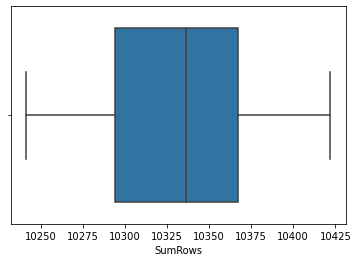

In [7]:
#Creating Sum of numeric answers and storing it to df
survey_df['SumRows'] = survey_df.sum(axis=1)

#Displaying if Outliers/dirty survey inputs
import seaborn as sns
sns.boxplot(x=survey_df['SumRows'])

#none detected

## Data Prep 

#### #Checking distribution of age

24    26
25    23
26    14
27    12
23     9
29     9
22     7
28     7
31     5
34     4
33     4
32     3
21     3
38     2
30     1
48     1
35     1
36     1
40     1
41     1
43     1
45     1
49     1
Name: What is your age?, dtype: int64

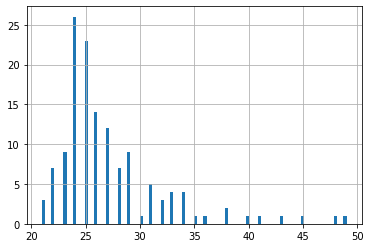

In [8]:
#Checking distribution of age for further categorization
#Histogram to display age

#Age
survey_df['What is your age?'].hist(bins=100)
survey_df['What is your age?'].value_counts()

The histogram represents the age groups of the survey and indicates three different generations according to domain knowledge: 
Generation Z: Aged <25
Generation Y: Aged 25- 43
Generation X: Aged >43

#### Aggregating age groups

In [9]:
# age groups
GenZ = [21,22,23,24]
                          

GenY  = [25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]

GenX =[45,48,49]
# placeholder list
holder_lst = []


# looping to group observations by age group
for age in survey_df['What is your age?']:
    
        if age in GenZ:
            holder_lst.append('GenZ')
            
        elif age in GenY:
            holder_lst.append('GenY')
             
        elif age in GenX:
            holder_lst.append('GenX')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
survey_df['Age_Group'] = pd.Series(holder_lst)


# checking results
survey_df['Age_Group'].value_counts()


GenY    89
GenZ    45
GenX     3
Name: Age_Group, dtype: int64

#### Improving Nationalities

In the following, we clean Nationalities by grouping different types of inputs for the same country.

In [10]:
nationality = survey_df['What is your nationality? '].str.capitalize()

# Placing new subset into new colum called 'nationality'
survey_df['nationality'] = nationality

In [11]:
# Dictionary to rename nationality
replaceable_names = {"India"               : "Indian",
                     "Indian."             : "Indian",
                     "Calm"                : "Prefer not to answer",
                     "."                   : "Prefer not to answer", 
                     "China"               : "Chinese",
                     "Taiwan"              : "Taiwanese",
                     "Taiwan( r.o.c)"      : "Taiwanese",
                     "Usa"                 : "American",
                     "Japan"               : "Japanese",
                     "Republic of korea"   : "South Korean",
                     "Ecuador"             : "Ecuadorian",
                     "Brazil"              : "Brazilian",
                     "Russia"              : "Russian",
                     "Spain"               : "Spanish",
                     "Colombia"            : "Colombian",
                     "Indonesia"           : "Indonesian",
                     "Czech republic"      : "Czech",
                     "Panama"              : "Panamanian",
                     "German/american"     : "Multi-ethnic",
                     "South korea"         : "South Korean",
                     "Mauritius"           : "Mauritian",
                     "Italian and spanish" : "Multi-ethnic",
                     "British, indian"     : "Multi-ethnic",
                     "Nigeria"             : "Nigerian",
                     "Korea"               : "South Korean",
                     "Germany"             : "German",
                     "Philippines"         : "Filipino",
                     "Filipino "           : "Filipino",
                     "Peru"                : "Peruvian",
                     "Canada"              : "Canadian",
                     "Belarus"             : "Belarusian",
                     "Congolese (dr congo)": "Congolese",
                     "Dominican "          : "Dominican",
                     "Dominican republic"  : "Dominican",
                     "French/ brazilian"   : "Multi-ethnic",
                     "Caribbean-american"  : "American",
                     "Thailand"            : "Thai",
                     "Belgian "            : "Belgian",
                     "Belgium"             : "Belgian",
                     "Malaysia"            : "Malaysian",
                     "Mexico"              : "Mexican",
                     "Poland"              : "Polish",
                     "Cameroon"            : "Cameroonian",
                     "Armenia"             : "Armenian",
                     "Iran"                : "Iranian",
                     "El salvador"         : "Salvarorian",
                     "Hispanic "           : "Prefer not to answer",
                     "Korean"              : "South Korean",
                     "South african"       : "South African",
                     "Costa rica"          : "Costarrican",
                     "Venezuela"           : "Venezuelan",
                     "English"             : "British"
                    }

# Replace the matching strings
survey_df['nationality'].replace(replaceable_names, inplace = True)

# Observing how many nationalities there are
survey_df['nationality'].value_counts()

Indian                  22
Chinese                 14
German                   7
Mexican                  6
Peruvian                 6
American                 6
Colombian                5
Russian                  5
Brazilian                5
Nigerian                 4
South Korean             4
Ecuadorian               3
Italian                  3
Norwegian                3
Indonesian               3
Taiwanese                3
Multi-ethnic             3
Thai                     2
Vietnamese               2
Filipino                 2
Czech                    2
Spanish                  2
Dominican                2
Turkish                  2
Congolese                2
Canadian                 2
Swiss                    1
Kenyan                   1
Prefer not to answer     1
Japanese                 1
Costarrican              1
Pakistani                1
Kyrgyz                   1
Belarusian               1
Mauritian                1
Venezuelan               1
Ukrainian                1
U

##### Aggregating country groups

Finally, we categorize countries into the global areas Asia, Africa, Europe, Americas, and International for multi-ethnicity and participants that don’t identify with a single country or prefer not to answer.

In [12]:


# country groups
Asia = ['Pakistani','Kyrgyz','Japanese','Filipino','Vietnamese','Thai','Turkish','Taiwanese','Indian','Chinese','Russian','South Korean','Indonesian']                       

Africa  = ['Kenyan','Ghanaian','Mauritian','Belarusian','Ugandan','Nigerian','Congolese']

Europe =['Swiss','Ukrainian','Belgian','Portuguese','British','German','Italian','Norwegian','Czech','Spanish']

Americas = ['Costarrican','Venezuelan','Panamanian','Canadian','Dominican','Ecuadorian','Brazilian','Peruvian','American','Mexican','Colombian',]

International = ['Multi-ethnic','Prefer not to answer']

# placeholder list
holder_lst = []


# looping to group observations by country group
for country in survey_df['nationality']:
    
        if country in Asia:
            holder_lst.append('Asia')
            
        elif country in Africa:
            holder_lst.append('Africa')
             
        elif country in Europe:
            holder_lst.append('Europe')
            
        elif country in Americas:
            holder_lst.append('Americas')
            
        elif country in International:
            holder_lst.append('International')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
survey_df['World_Area'] = pd.Series(holder_lst)


# checking results
survey_df['World_Area'].value_counts()


Asia             62
Americas         38
Europe           22
Africa           11
International     4
Name: World_Area, dtype: int64

#### Dropping duplicate columns
We realized that there are duplicate columns. After investigating their values, we decided to drop them as they were similar.

In [13]:
# Dropping one of the duplicated columns now that we have the average
survey_df = survey_df.drop(['Respond effectively to multiple priorities.1',
                           "Take initiative even when circumstances, objectives, or rules aren't clear.1",
                           "Encourage direct and open discussions.1"],
                           axis = 1)

#### Identifying the demographics data and drop it
We would like to drop categorical data to be able to run PCA and Clustering.

In [14]:

# Store demographics in a list
demographic =           ['surveyID',
                         'What laptop do you currently have?',
                         'What laptop would you buy in next assuming if all laptops cost the same?',
                         'What program are you in?',
                         'What is your age?',
                         'Gender',
                         'What is your nationality? ',
                         'What is your ethnicity?',
                         'World_Area',
                         'nationality',
                         'Age_Group']

# Dropping demographic varaible saved from earlier
responds_df = survey_df.drop(demographic, axis = 1)

#### Creating Histograms for the Respond Variables

Just displaying 9 of them to see the distribution. Based on what we see, log transformation is not a necessary step.

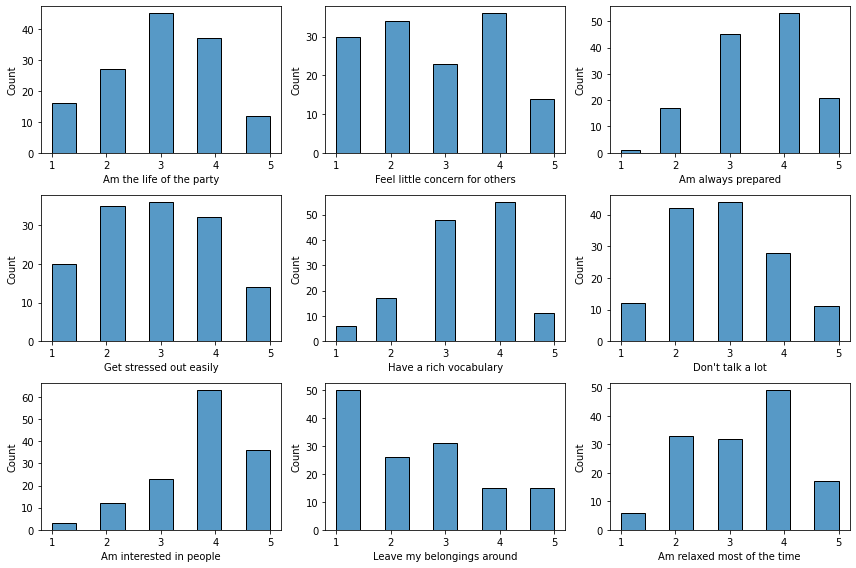

In [15]:
# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))


# initializing a counter
count = 0


# looping to create visualizations
for col in responds_df:

    # condition to break
    if count == 9:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(3, 3, count)
    sns.histplot(x = responds_df[col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
plt.show()

#### Scaling the Dataset
Scaling the responds variables to put then in the same scale for PCA.

In [16]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(responds_df)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(responds_df)


# converting scaled data into a DataFrame
responds_scaled = pd.DataFrame(X_scaled)


# reattaching column names
responds_scaled.columns = responds_df.columns


# checking pre- and post-scaling variance
print(pd.np.var(responds_df), '\n\n')
print(pd.np.var(responds_scaled))

Am the life of the party                                                         1.284458
Feel little concern for others                                                   1.747669
Am always prepared                                                               0.845543
Get stressed out easily                                                          1.469764
Have a rich vocabulary                                                           0.899142
Don't talk a lot                                                                 1.168842
Am interested in people                                                          0.956790
Leave my belongings around                                                       1.847515
Am relaxed most of the time                                                      1.193138
Have difficulty understanding abstract ideas                                     1.198679
Feel comfortable around people                                                   0.999094
Insult peo

/Users/takahashikazuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/takahashikazuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


#### Creating two different subset for questions related Big Five and Hult DNA
Here we are creating two different subset of the questions based on Big Five and Hult DNA personality traits.

Big Five

In [17]:
# Locate columns for the group
extraversion_questions = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# Index the columns
extraversion = responds_df.iloc[:,extraversion_questions]

####################################################################

# Locate columns for the group
agreeableness_questions = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]

# Index the columns
agreeableness = responds_df.iloc[:,agreeableness_questions]

####################################################################

# Locate columns for the group
conscientiousness_questions = [2, 7,12, 17, 22, 27, 32, 37, 42, 47]

# Index the columns
conscientiousness = responds_df.iloc[:,conscientiousness_questions]

####################################################################

# Locate columns for the group
neuroticism_questions = [3, 8, 13, 18, 23, 28, 33, 38, 43, 48]

# Index the columns
neuroticism = responds_df.iloc[:,neuroticism_questions]

####################################################################

# Locate columns for the group
openness_questions = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49]

# Index the columns
openness = responds_df.iloc[:,openness_questions]

####################################################################

# Merge the grouped data into one df
big_five_df = pd.concat([extraversion,agreeableness, conscientiousness, 
                        neuroticism, openness], axis = 1)

# Convert group df into a dataframe
big_five_df = pd.DataFrame(big_five_df)

big_five_df

,Am the life of the party,Don't talk a lot,Feel comfortable around people,Keep in the background,Start conversations,Have little to say,Talk to a lot of different people at parties,Don't like to draw attention to myself,Don't mind being the center of attention,Am quiet around strangers,Feel little concern for others,Am interested in people,Insult people,Sympathize with others' feelings,Am not interested in other people's problems,Have a soft heart,Am not really interested in others,Take time out for others,Feel others' emotions,Make people feel at ease,Am always prepared,Leave my belongings around,Pay attention to details,Make a mess of things,Get chores done right away,Often forget to put things back in their proper place,Like order,Shirk my duties,Follow a schedule,Am exacting in my work,Get stressed out easily,Am relaxed most of the time,Worry about things,Seldom feel blue,Am easily disturbed,Get upset easily,Change my mood a lot,Have frequent mood swings,Get irritated easily,Often feel blue,Have a rich vocabulary,Have difficulty understanding abstract ideas,Have a vivid imagination,Am not interested in abstract ideas,Have excellent ideas,Do not have a good imagination,Am quick to understand things,Use difficult words,Spend time reflecting on things,Am full of ideas
0,4,2,2,4,4,2,3,3,3,3,3,3,1,4,3,4,2,3,3,3,4,2,5,2,4,2,5,2,4,4,3,3,4,2,2,2,4,3,2,2,4,2,4,3,3,3,4,3,4,3
1,2,3,3,3,3,3,2,4,2,4,4,2,1,4,5,4,2,4,3,5,3,3,4,2,3,2,5,3,5,5,4,4,4,4,4,1,4,2,4,3,3,2,5,2,4,1,4,2,5,4
2,4,3,3,3,3,2,4,4,5,3,4,2,3,2,4,3,3,3,3,3,5,2,5,1,4,2,1,2,4,3,1,5,1,5,3,2,2,1,4,1,4,1,2,4,3,2,5,2,2,4
3,4,3,3,5,4,4,3,3,2,3,5,5,1,5,2,5,3,4,5,5,3,3,4,3,3,2,3,3,3,3,3,5,4,3,1,2,4,4,5,3,3,4,5,3,5,1,3,3,5,5
4,5,3,3,4,3,3,3,4,4,3,4,3,3,4,3,3,3,3,4,3,4,3,3,4,3,3,3,3,4,4,4,3,4,4,3,3,3,4,3,4,3,3,5,4,3,3,4,4,3,3
5,3,2,2,4,2,4,2,4,3,4,2,4,2,4,2,4,2,4,4,3,2,2,4,4,2,3,3,3,2,3,5,3,5,2,4,3,4,3,4,4,2,2,3,3,3,2,4,3,4,3
6,3,4,2,3,2,3,4,1,3,5,4,4,2,4,2,4,2,4,4,4,4,3,4,3,1,2,3,3,4,3,5,2,4,3,4,4,3,3,4,3,3,1,3,2,4,2,4,2,3,3
7,3,1,5,2,4,2,3,2,4,3,5,4,1,4,2,4,2,4,4,4,4,1,5,2,3,3,4,2,4,4,2,3,3,4,2,2,2,1,1,1,4,1,3,2,4,2,4,3,5,3
8,1,3,3,3,4,2,3,4,2,4,3,3,1,3,2,3,4,3,4,4,5,1,5,2,3,2,2,3,4,4,4,4,3,3,4,2,3,2,2,2,2,3,4,2,3,3,4,2,3,3
9,3,4,4,2,3,2,3,2,4,3,4,3,2,3,2,4,2,5,3,5,5,1,5,1,4,1,5,1,5,5,4,2,3,1,1,2,2,1,3,1,4,1,4,1,4,2,4,3,4,4


Hult DNA

In [18]:
# Locate columns for the group
thinking_questions = [50, 51, 52, 53, 54, 55]

# Index the columns
thinking = responds_df.iloc[:,thinking_questions]

#######################################################

# Locate columns for the group
team_questions = [56, 59, 60, 64, 65, 66, 67]

# Index the columns
team = responds_df.iloc[:,team_questions]

#######################################################

communication_questions = [57, 58, 61, 62, 63]

# Index the columns
communication = responds_df.iloc[:,communication_questions]

#######################################################

# Merge the grouped data into one df
hult_DNA_df = pd.concat([thinking, team, communication], axis = 1)

# Convert group df into a datafra,
hult_DNA_df = pd.DataFrame(hult_DNA_df)

hult_DNA_df

,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Build cooperative relationships,Work well with people from diverse cultural backgrounds,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,Listen carefully to others,Don't persuasively sell a vision or idea,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic
0,4,2,4,4,4,4,4,4,4,4,4,4,4,4,3,4,2,4
1,4,2,2,4,4,4,5,4,4,5,5,4,5,5,2,2,3,4
2,3,2,5,3,5,2,3,3,4,2,3,3,5,3,2,4,2,4
3,3,3,3,5,5,5,4,5,5,5,5,5,5,5,3,5,5,3
4,3,3,5,3,3,3,3,3,3,3,3,3,3,4,4,4,4,3
5,4,2,3,4,4,3,3,3,4,3,5,3,4,4,4,3,2,3
6,4,3,4,5,4,3,4,4,5,4,5,4,5,4,2,4,4,5
7,4,2,4,4,4,4,4,4,4,4,4,4,4,4,3,4,1,5
8,4,4,4,4,4,3,4,4,4,4,4,4,4,4,3,4,2,4
9,4,1,5,5,5,5,4,4,5,4,5,4,5,4,2,4,3,4


## Big FIve - Principal Component Analysis (PCA)
Here we will start our PCA Analysis to create components out of our variables.

In [19]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
big_five_pca = pca.fit_transform(big_five_df)


# comparing dimensions of each DataFrame
print("Original shape:", big_five_df.shape)
print("PCA shape     :", big_five_pca.shape)

Original shape: (137, 50)
PCA shape     : (137, 50)


In [20]:
pd.DataFrame(big_five_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.042820,0.111571,-0.531805,-1.154009,-0.506979,0.904277,-0.933040,0.056832,-0.364263,0.094302,-0.176449,-0.029771,-0.788082,0.711856,-0.651729,-0.044671,1.081315,-1.009152,0.668510,-0.510373,-0.164036,-1.502308,-0.463856,1.517881,0.611172,0.079953,-0.757860,1.267249,-0.453875,0.366410,-0.161213,-0.328983,0.575575,0.312791,1.524300,0.608597,0.273528,0.188021,-0.483555,0.489780,-0.228257,0.436332,-0.197438,0.624715,-0.080411,0.470919,-0.016157,-0.389390,0.437991,-0.085429
1,1.386853,-1.132487,-1.150246,0.185425,2.504498,-0.435978,0.225242,-1.849449,-0.670185,-0.284719,-1.600081,-1.869905,-0.068921,0.569446,0.370318,0.808923,-1.030336,-0.178283,1.041350,-1.056590,-0.463443,-0.357739,0.794708,-0.247658,0.755524,-1.508772,-1.006449,0.679004,-0.933229,0.103576,-0.256630,-0.191910,0.973728,-0.412692,-0.868886,-0.674431,0.516504,-0.134701,-0.822437,1.214687,1.178672,0.571782,0.202548,-0.016904,-0.323947,-0.933050,0.298569,0.544995,0.574327,0.018193
2,-0.197870,-2.844957,4.276238,-3.720268,0.893655,-0.051379,-2.487039,-1.112928,1.457318,-0.775526,1.046012,0.493903,0.230095,0.539101,2.986175,0.432927,0.536740,0.681758,1.747056,-1.140238,0.667535,0.831919,0.127564,0.869640,-0.058069,0.435157,-0.163575,-0.205259,0.543544,-0.604163,-0.113240,-0.892517,-0.180843,0.928747,-0.511477,0.435549,0.600364,-0.765575,1.657888,-0.602265,-0.677447,0.852509,-0.349127,0.790095,-0.059669,0.014095,0.236421,0.215869,-0.187120,0.298498
3,2.023909,1.958986,-0.211851,2.591906,1.017747,-1.845215,-1.540424,-1.898654,-2.238871,-1.033956,0.440079,0.262258,-1.776853,-0.151412,-0.595665,0.345180,0.775966,0.795829,-0.011271,0.099919,-1.161950,-1.053869,0.732512,0.823818,-1.067076,-0.199239,1.735953,-1.007059,0.135449,0.736065,-0.165809,0.911687,0.548998,-0.152256,0.202818,-0.389828,0.566239,-1.322356,0.315311,-0.591390,-0.017031,0.179767,-0.110673,-0.178769,-0.600052,-0.889484,0.288364,-0.595516,-0.241030,0.782807
4,4.041850,1.129185,1.320781,-0.330235,-0.288537,1.393689,-1.318541,0.075701,0.199622,0.546661,1.697858,-0.772759,-0.636245,0.944757,0.046149,0.444871,1.028455,0.079348,-0.260800,0.347666,-0.052507,1.421060,1.043942,-0.224280,-0.079761,0.209775,-1.045388,0.227380,-0.117035,0.526606,0.031760,0.432047,0.155494,-0.398825,1.046098,-0.162998,0.269962,-0.695033,-0.105463,0.448759,-0.196573,0.094066,-0.020725,0.442049,-0.306985,0.078969,-0.889078,0.245503,-0.096043,-0.146731
5,4.332813,0.348047,-2.179295,0.517047,-1.342833,-0.331610,0.918835,2.110721,0.440633,0.118895,1.363857,0.244792,0.136650,0.184732,1.313500,-0.720538,0.229502,-0.093177,-0.539607,-0.765567,-1.229620,-0.575678,1.071241,1.114276,-0.347267,-0.580266,0.228162,-0.483130,-0.032765,0.675419,-0.448538,-0.385118,0.848167,-0.338912,-0.584698,-0.774810,0.557908,0.360185,0.631894,0.449932,0.411758,0.327167,-0.053183,0.375556,-0.039028,-0.002733,0.218610,0.242056,0.667959,0.165269
6,3.249713,0.626104,-1.163898,-0.626657,-0.380582,-0.748580,1.736279,-1.326276,0.753891,0.317531,1.871007,1.736028,0.431370,-0.508792,0.732516,-0.307272,-0.633424,-0.729981,2.533496,0.048164,-0.111650,0.869316,-0.145841,-0.372520,-0.570374,0.511827,0.376334,0.060885,0.398008,-0.311611,-1.384287,-0.941680,0.489340,-0.642595,-0.258270,-1.275677,0.327054,0.822984,-0.265718,-0.263508,0.112455,-0.621033,0.345921,-0.675951,0.115996,0.570802,0.030238,-0.215389,0.109322,-0.621672
7,-3.457427,-0.000072,1.820059,-1.080778,-0.558469,-1.301798,-0.382563,0.217724,-0.492238,1.168706,1.544053,-0.412878,0.231760,-0.408909,-0.643172,0.897464,-1.746223,-0.249800,0.793593,-0.407003,0.062206,-0.360605,-0.028975,0.754602,0.106614,-0.360103,-0.032712,0.901111,0.239003,0.249753,-0.232346,-0.285626,-0.843058,-0.282317,0.499686,-0.544499,-0.100216,1.119589,0.631866,0.144894,0.988912,0.215371,0.526410,0.044778,-0.504154,0.416031,-0.053519,-0.380766,0.144605,0.059484
8,0.811741,-2.249455,-0.497971,-1.060870,-0.84

#### Evaluating PCA Algorithm
To evaluate the PCA algorithm we check the variances within PCA.

In [21]:
# component number counter
component_number = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.129
PC 2 : 0.092
PC 3 : 0.079
PC 4 : 0.059
PC 5 : 0.053
PC 6 : 0.04
PC 7 : 0.039
PC 8 : 0.036
PC 9 : 0.029
PC 10 : 0.027
PC 11 : 0.025
PC 12 : 0.024
PC 13 : 0.022
PC 14 : 0.022
PC 15 : 0.02
PC 16 : 0.019
PC 17 : 0.018
PC 18 : 0.016
PC 19 : 0.016
PC 20 : 0.015
PC 21 : 0.015
PC 22 : 0.014
PC 23 : 0.013
PC 24 : 0.013
PC 25 : 0.012
PC 26 : 0.012
PC 27 : 0.011
PC 28 : 0.01
PC 29 : 0.01
PC 30 : 0.009
PC 31 : 0.008
PC 32 : 0.008
PC 33 : 0.008
PC 34 : 0.007
PC 35 : 0.007
PC 36 : 0.007
PC 37 : 0.006
PC 38 : 0.006
PC 39 : 0.005
PC 40 : 0.005
PC 41 : 0.004
PC 42 : 0.004
PC 43 : 0.004
PC 44 : 0.004
PC 45 : 0.003
PC 46 : 0.003
PC 47 : 0.003
PC 48 : 0.003
PC 49 : 0.002
PC 50 : 0.002


Let's take a look at our variances in a scree plot. This will help to decide on our components number.

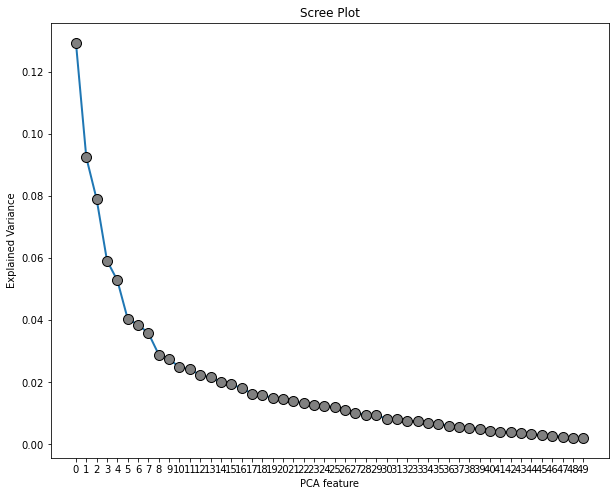

In [22]:
# calling the scree_plot function
scree_plot(pca_object = pca)

Re-create the PCA with 5 components after discussions with the team based on the scree plot. We try to focus on where the variances are stabilizing. 

In [23]:
# INSTANTIATING a PCA object with no limit to principal components
pca_5 = PCA(n_components = 5,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
big_five_pca_5 = pca_5.fit_transform(big_five_df)


# comparing dimensions of each DataFrame
print("Original shape:", big_five_df.shape)
print("PCA shape     :", big_five_pca_5.shape)

Original shape: (137, 50)
PCA shape     : (137, 5)


In [24]:
pd.DataFrame(big_five_pca_5)

,0,1,2,3,4
0,-0.042820,0.111571,-0.531805,-1.154009,-0.506979
1,1.386853,-1.132487,-1.150246,0.185425,2.504498
2,-0.197870,-2.844957,4.276238,-3.720268,0.893655
3,2.023909,1.958986,-0.211851,2.591906,1.017747
4,4.041850,1.129185,1.320781,-0.330235,-0.288537
5,4.332813,0.348047,-2.179295,0.517047,-1.342833
6,3.249713,0.626104,-1.163898,-0.626657,-0.380582
7,-3.457427,-0.000072,1.820059,-1.080778,-0.558469
8,0.811741,-2.249455,-0.497971,-1.060870,-0.845872
9,-3.448537,-0.031709,-0.963394,-2.579926,0.335583


How our variances look like after fixing our components number.

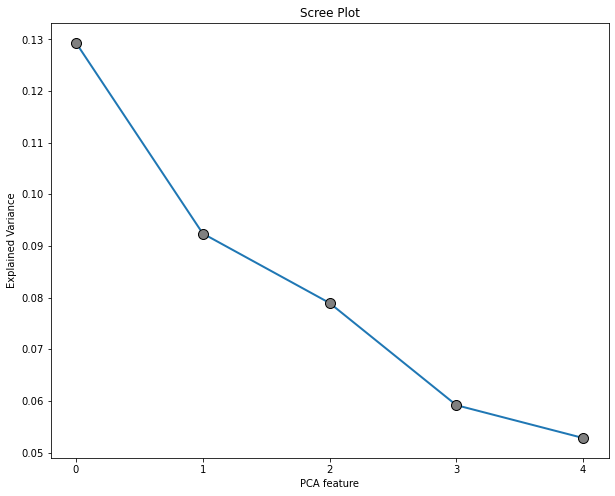

In [25]:
# calling the scree_plot function
scree_plot(pca_object = pca_5)

In [26]:
# component number counter
component_number = 0


# looping over each principal component
for variance in pca_5.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.129
PC 2 : 0.092
PC 3 : 0.079
PC 4 : 0.059
PC 5 : 0.053


#### Analyze the PCA factor loadings
Here we are cross checking our components with our variables to decide on our personas.

In [27]:
# transposing pca components
bigfive_factor_loadings_df = pd.DataFrame(pd.np.transpose(pca_5.components_))


# naming rows as original features
bigfive_factor_loadings_df = bigfive_factor_loadings_df.set_index(big_five_df.columns)


# checking the result
print(bigfive_factor_loadings_df)


# saving to Excel
bigfive_factor_loadings_df.to_excel('bigfive_factor_loadings.xlsx')

                                                              0         1         2         3         4
Am the life of the party                               0.010327  0.281119  0.211207  0.003054 -0.038302
Don't talk a lot                                       0.124133 -0.187131 -0.107074  0.172574  0.140793
Feel comfortable around people                        -0.185289  0.141398  0.181625  0.139192 -0.108000
Keep in the background                                 0.137282 -0.114969 -0.126273  0.239882  0.040747
Start conversations                                   -0.116142  0.251188  0.188247  0.021977 -0.042820
Have little to say                                     0.151577 -0.115258  0.009882  0.214684 -0.076465
Talk to a lot of different people at parties          -0.013967  0.251468  0.240632  0.074939  0.003574
Don't like to draw attention to myself                 0.084722 -0.179374 -0.113700  0.149546  0.225816
Don't mind being the center of attention              -0.075423 

/Users/takahashikazuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


#### Labeling  Big Five Components
After having discussions using the factor loadings excel file, we agreed on the labels below. We picked a threshold value at 0.15, and analyze our factor loadings based on that value. We also used Big Five personality traits: Extraversion, agreeableness, conscientiousness, neuroticism and openness.

In [28]:
# naming each principal component
bigfive_factor_loadings_df.columns = ['Messy Students',               
                                      'Stressed Extraverts',          
                                      'Party Students', 
                                      'Solution Seekers',            
                                      'Introverted Open Minders']        


# checking the result
bigfive_factor_loadings_df

,Messy Students,Stressed Extraverts,Party Students,Solution Seekers,Introverted Open Minders
Am the life of the party,0.010327,0.281119,0.211207,0.003054,-0.038302
Don't talk a lot,0.124133,-0.187131,-0.107074,0.172574,0.140793
Feel comfortable around people,-0.185289,0.141398,0.181625,0.139192,-0.108000
Keep in the background,0.137282,-0.114969,-0.126273,0.239882,0.040747
Start conversations,-0.116142,0.251188,0.188247,0.021977,-0.042820
Have little to say,0.151577,-0.115258,0.009882,0.214684,-0.076465
Talk to a lot of different people at parties,-0.013967,0.251468,0.240632,0.074939,0.003574
Don't like to draw attention to myself,0.084722,-0.179374,-0.113700,0.149546,0.225816
Don't mind being the center of attention,-0.075423,0.281325,0.171519,-0.161252,-0.086475
Am quiet around strangers,0.139862,-0.222151,-0.189856,0.143219,0.165008


#### Student Level Personas
Here we are checking all our observations (students) with our persona selections.

In [29]:
# converting into a DataFrame 
big_five_pca_5 = pd.DataFrame(big_five_pca_5)


# renaming columns
big_five_pca_5.columns = bigfive_factor_loadings_df.columns


# checking results
big_five_pca_5

,Messy Students,Stressed Extraverts,Party Students,Solution Seekers,Introverted Open Minders
0,-0.042820,0.111571,-0.531805,-1.154009,-0.506979
1,1.386853,-1.132487,-1.150246,0.185425,2.504498
2,-0.197870,-2.844957,4.276238,-3.720268,0.893655
3,2.023909,1.958986,-0.211851,2.591906,1.017747
4,4.041850,1.129185,1.320781,-0.330235,-0.288537
5,4.332813,0.348047,-2.179295,0.517047,-1.342833
6,3.249713,0.626104,-1.163898,-0.626657,-0.380582
7,-3.457427,-0.000072,1.820059,-1.080778,-0.558469
8,0.811741,-2.249455,-0.497971,-1.060870,-0.845872
9,-3.448537,-0.031709,-0.963394,-2.579926,0.335583


#### How our components stand based on our threshold value
Checking our personas with our threshold value to see if there is any that are not significant.

In [30]:
for val in big_five_pca_5.columns:
    test = len(big_five_pca_5[val][big_five_pca_5[val] < - 0.15]) / \
    len(big_five_pca_5) 
    print(f" {val} : {test}")
    

 Messy Students : 0.5036496350364964
 Stressed Extraverts : 0.45985401459854014
 Party Students : 0.48905109489051096
 Solution Seekers : 0.5401459854014599
 Introverted Open Minders : 0.5255474452554745


## Big Five - Clustering 

<br>Using an agglomerative clustering model, we found how many clusters was appropriate to our analysis.
From the dandrogram and the inertia plot, we found the optimal number of clusters would be 5. The process is below.

#### Variance amongst clusters

Before starting the model, we have to see how each variance differs, since it is not equal anymore.


In [31]:
# checking variance amongst clusters
np.var(big_five_pca_5)

Messy Students              7.082468
Stressed Extraverts         5.059932
Party Students              4.323354
Solution Seekers            3.240158
Introverted Open Minders    2.891998
dtype: float64

#### Prepare a scaled version of the factor loadings dataset

In [32]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(big_five_pca_5)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(big_five_pca_5)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Messy Students',
                      'Stressed Extraverts',          
                      'Party Students', 
                      'Solution Seekers',            
                      'Introverted Open Minders']


# checking pre- and post-scaling variance
print(pd.np.var(big_five_pca_5), '\n\n')
print(pd.np.var(pca_scaled))

Messy Students              7.082468
Stressed Extraverts         5.059932
Party Students              4.323354
Solution Seekers            3.240158
Introverted Open Minders    2.891998
dtype: float64 


Messy Students              1.0
Stressed Extraverts         1.0
Party Students              1.0
Solution Seekers            1.0
Introverted Open Minders    1.0
dtype: float64


/Users/takahashikazuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/takahashikazuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


### Agglomerative Clustering

#### Develop a dendrogram to see how many clusters to build using k-Means

Here, we use 'ward' method of dendrogram, which groups observations into clusters by minimizing the variance amongst all clusters.


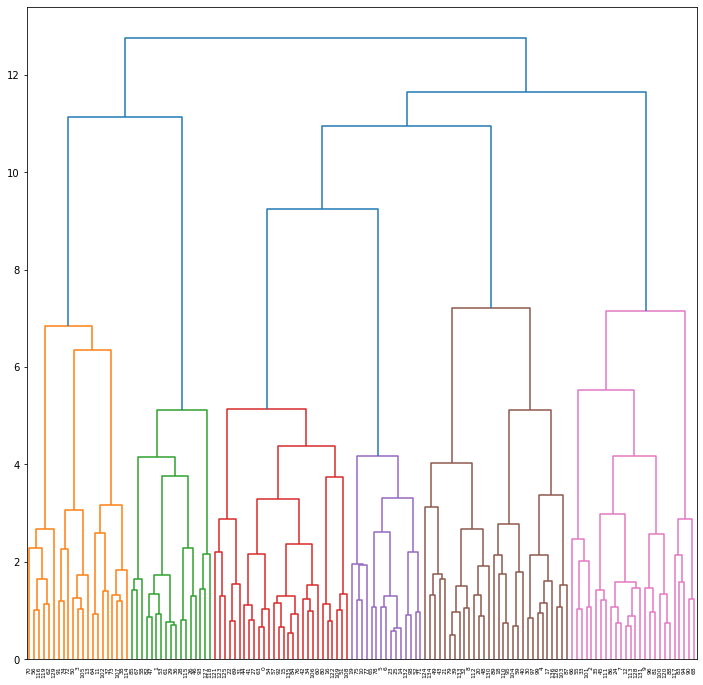

In [33]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# displaying the plot
plt.show()

From the above, We can assume 4 to 12 clusters would be ideal.

#### Develop a code to analyze the inertia plot.

To find out the optimal number of clusters.

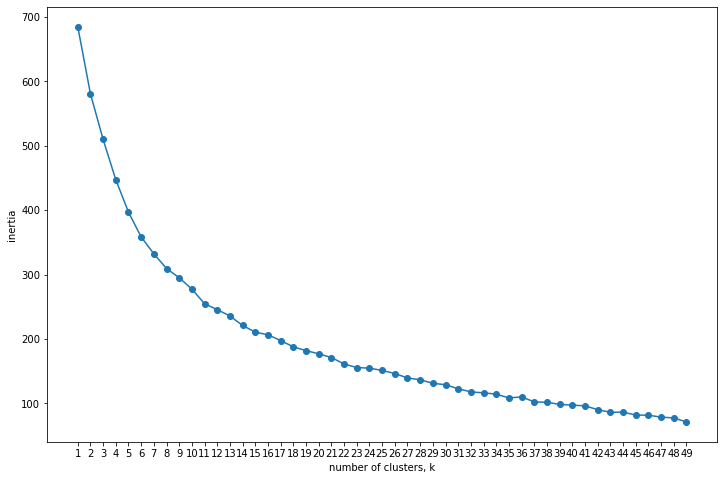

In [34]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

From the inertia plot above, you can assume the optimal number of clusters would be less than 6.
Based on the dendrogram and the inertia plot, we cocluded the optimal number of clusters would be 5.

#### Develop a k-Means model with clusters


We examined our candidate number of clusters and show the counts of each cluster to see whether it is not  distributed oddly.

In [35]:
# INSTANTIATING a k-Means object with clusters
bigfive_k_pca = KMeans(n_clusters   = 5,
                         random_state = 219)


# fitting the object to the data
bigfive_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
bigfive_kmeans_pca = pd.DataFrame({'Cluster': bigfive_k_pca.labels_})


# checking the results
print(bigfive_kmeans_pca.iloc[: , 0].value_counts())

3    36
0    32
4    24
1    24
2    21
Name: Cluster, dtype: int64


#### Display the centroids for each cluster

You can see the center of each cluster.

In [36]:
# storing cluster centers
centroids_pca = bigfive_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Messy Students',
                      'Stressed Extraverts',          
                      'Party Students', 
                      'Solution Seekers',            
                      'Introverted Open Minders'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Messy Students,Stressed Extraverts,Party Students,Solution Seekers,Introverted Open Minders
0,-1.11,0.54,0.32,-0.40,0.06
1,0.59,0.88,-0.55,0.97,0.05
2,-0.15,-0.97,-0.71,0.21,1.24
3,-0.04,-0.61,0.13,0.19,-0.95
4,1.08,0.16,0.54,-0.91,0.20


#### Renaming clusters

In [37]:
# Cluster
cluster = ['1', '2', '3', '4', '5']

# Assigning cluster object 
centroids_pca_df.index = cluster
centroids_pca_df.round(2)

,Messy Students,Stressed Extraverts,Party Students,Solution Seekers,Introverted Open Minders
1,-1.11,0.54,0.32,-0.40,0.06
2,0.59,0.88,-0.55,0.97,0.05
3,-0.15,-0.97,-0.71,0.21,1.24
4,-0.04,-0.61,0.13,0.19,-0.95
5,1.08,0.16,0.54,-0.91,0.20


#### Concatenate the demographics with the clusters
Here we are going to plug our categorical variables back in to include them in our analysis.

In [38]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([bigfive_kmeans_pca,
                         big_five_pca_5],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_df.loc[ : , [ 'What laptop do you currently have?',
                                                     'What laptop would you buy in next assuming if all laptops cost the same?',
                                                     'What program are you in?',
                                                     'Gender',
                                                     'What is your ethnicity?',
                                                     'World_Area',
                                                     'nationality',  
                                                     'Age_Group']],
                                        clst_pca_df],
                                        axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Laptop Owned',
                              'Desired Laptop',
                              'Program',
                              'Gender',
                              'Ethnicity',
                              'Region',
                              'Nationality',
                              'Age Group',
                              'Cluster',
                              'Messy Students',
                              'Stressed Extraverts',
                              'Party Students',
                              'Solution Seekers',
                              'Introverted Open Minders']


# checking the results
final_pca_clust_df.head(n = 5)

,Laptop Owned,Desired Laptop,Program,Gender,Ethnicity,Region,Nationality,Age Group,Cluster,Messy Students,Stressed Extraverts,Party Students,Solution Seekers,Introverted Open Minders
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,Hispanic / Latino,Americas,Ecuadorian,GenY,3,-0.042820,0.111571,-0.531805,-1.154009,-0.506979
1,Windows laptop,Windows laptop,One year Business Analytics,Male,Hispanic / Latino,Americas,Ecuadorian,GenY,2,1.386853,-1.132487,-1.150246,0.185425,2.504498
2,Windows laptop,Windows laptop,One year Business Analytics,Male,West Asian / Indian,Asia,Indian,GenY,4,-0.197870,-2.844957,4.276238,-3.720268,0.893655
3,Windows laptop,Windows laptop,One year Business Analytics,Female,West Asian / Indian,Asia,Indian,GenY,1,2.023909,1.958986,-0.211851,2.591906,1.017747
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),Male,Far east Asian,Asia,Chinese,GenY,4,4.041850,1.129185,1.320781,-0.330235,-0.288537


#### Renaming Clusters

In [39]:
# renaming Clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

,Laptop Owned,Desired Laptop,Program,Gender,Ethnicity,Region,Nationality,Age Group,Cluster,Messy Students,Stressed Extraverts,Party Students,Solution Seekers,Introverted Open Minders
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,Hispanic / Latino,Americas,Ecuadorian,GenY,Cluster 4,-0.042820,0.111571,-0.531805,-1.154009,-0.506979
1,Windows laptop,Windows laptop,One year Business Analytics,Male,Hispanic / Latino,Americas,Ecuadorian,GenY,Cluster 3,1.386853,-1.132487,-1.150246,0.185425,2.504498
2,Windows laptop,Windows laptop,One year Business Analytics,Male,West Asian / Indian,Asia,Indian,GenY,Cluster 5,-0.197870,-2.844957,4.276238,-3.720268,0.893655
3,Windows laptop,Windows laptop,One year Business Analytics,Female,West Asian / Indian,Asia,Indian,GenY,Cluster 2,2.023909,1.958986,-0.211851,2.591906,1.017747
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),Male,Far east Asian,Asia,Chinese,GenY,Cluster 5,4.041850,1.129185,1.320781,-0.330235,-0.288537
5,Macbook,Macbook,DD (MIB & Business Analytics),Male,West Asian / Indian,Asia,Indian,GenZ,Cluster 2,4.332813,0.348047,-2.179295,0.517047,-1.342833
6,Windows laptop,Macbook,DD (MIB & Business Analytics),Female,Hispanic / Latino,Americas,Dominican,GenZ,Cluster 5,3.249713,0.626104,-1.163898,-0.626657,-0.380582
7,Windows laptop,Windows laptop,DD (MIB & Business Analytics),Female,White / Caucasian,Europe,Swiss,GenY,Cluster 1,-3.457427,-0.000072,1.820059,-1.080778,-0.558469
8,Macbook,Macbook,DD (MBA & Business Analytics),Male,Far east Asian,Asia,Japanese,GenY,Cluster 4,0.811741,-2.249455,-0.497971,-1.060870,-0.845872
9,Windows laptop,Chromebook,DD (MBA & Business Analytics),Male,Hispanic / Latino,Americas,Costarrican,GenY,Cluster 1,-3.448537,-0.031709,-0.963394,-2.579926,0.335583


## Analyzing with Demographics

Here we are plotting students with their current laptop and desire laptop to see any variations between clusters. We picked "solutions seekers" for this part because it gave us more insights.

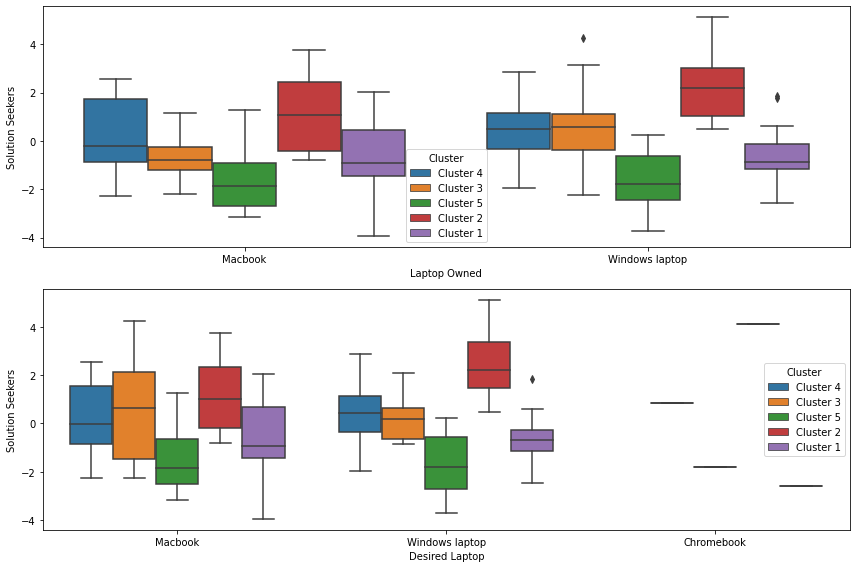

In [40]:
# Solution Seekers
# Laptop 
fig, ax = plt.subplots(figsize = (12, 8))
plt.subplot(2, 1, 1)
# Laptop Owned
sns.boxplot(x = 'Laptop Owned',
            y = 'Solution Seekers',
            hue = 'Cluster',
            data = data_df)

plt.subplot(2, 1, 2)
# Desired Laptop
sns.boxplot(x = 'Desired Laptop',
            y = 'Solution Seekers',
            hue = 'Cluster',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()



#### Insigths Regarding Laptop Preference

Anlyzing the first boxplot above we realized that Cluster 2,3 and 4 have more Windows Laptos than Macbook. Looking at the second chart for the same clusters, we can see that they still would like to buy Windows more than Macbook. Let's go to next step and see this clusters demographics.

In this part, we plot the same personas with Region and Age to catch more insights.

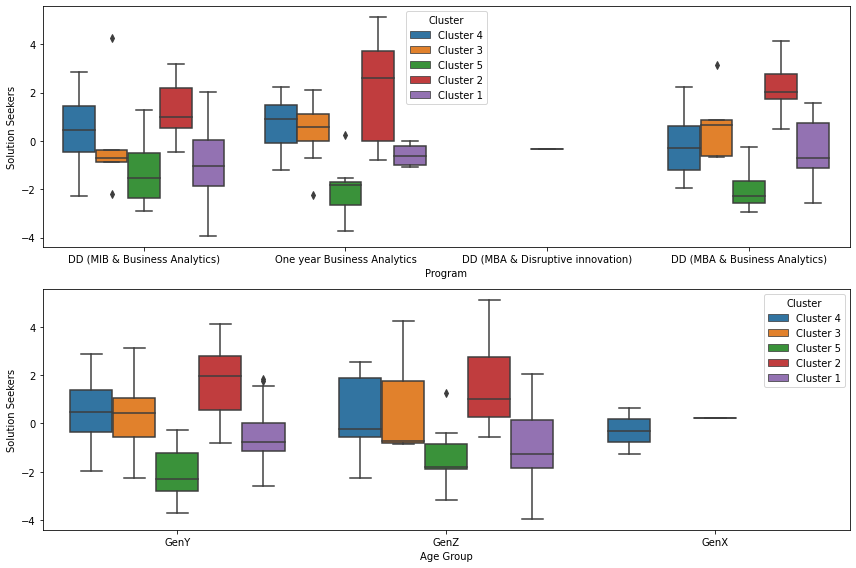

In [41]:
# Demogrophics
fig, ax = plt.subplots(figsize = (12, 8))
# Program
plt.subplot(2, 1, 1)
sns.boxplot(x = 'Program',
            y = 'Solution Seekers',
            hue = 'Cluster',
            data = data_df)
# Age
plt.subplot(2, 1, 2)
sns.boxplot(x = 'Age Group',
            y = 'Solution Seekers',
            hue = 'Cluster',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

#### More Insights with Demographics

Above in the first chart, we can see that the clusters 2,3,4 which are going for Windows Laptops are mostly doing technical degrees. Considering all the program languages they used, they may think that windows have more ability and easy interface to go along with that. So, this could be a good inside for Apple to either improve technically or generate more campaigns targeting these students and convince them that Macbook works well with complex computer programs.

Second plot shows that these students are more GenY, so Apple can focus on their interests for forming their campaigns. Considering their personas being "solution seekers", with reasonable campaigns it should not be hard to convince them so there is a great potential. For the ones with Macbook preferences, Apple can remain their current strategy. 

## Hult DNA - Principal Component Analysis (PCA)
Here we will start our PCA Analysis with Hult DNA personality traits to create components out of our variables.

In [42]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
hult_DNA_pca = pca.fit_transform(hult_DNA_df)


# comparing dimensions of each DataFrame
print("Original shape:", hult_DNA_df.shape)
print("PCA shape     :", hult_DNA_pca.shape)

Original shape: (137, 18)
PCA shape     : (137, 18)


In [43]:
pd.DataFrame(hult_DNA_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.059294,-0.399082,0.071931,0.410957,-0.253023,-0.265799,-0.390147,0.278773,-0.009139,-0.008808,0.015052,-0.058085,-0.050861,-0.008649,-0.179744,-0.047722,0.024071,-0.155202
1,-0.257926,-0.369998,-1.167389,-0.238584,0.720729,0.267053,-0.813824,-1.318674,1.657987,-0.374530,2.018331,0.755577,0.120678,0.930189,-0.201957,-0.428446,-0.486003,0.210482
2,1.889151,-1.780606,0.376768,0.469952,-0.826114,0.253248,1.470815,-0.679310,-1.253056,-0.355705,-1.676445,-0.728884,-0.532951,1.381210,-0.194600,0.760649,-0.232090,0.442611
3,-1.401220,2.562220,-0.847656,-1.308511,0.749191,-0.424806,-1.134350,-1.247649,0.944912,-0.154047,-1.027655,0.967891,-0.115030,0.515657,1.205046,0.197788,-0.337102,-0.660812
4,3.399164,1.200859,-0.141344,-0.290348,-0.274836,-0.285907,0.007827,0.962562,-0.628082,-0.678485,-0.842436,-1.072737,-0.232826,-0.131223,-0.656149,0.602723,0.069377,-0.291276
5,2.018417,-0.180765,-0.343235,1.396886,-0.609941,-1.082573,0.004266,-0.555926,-0.352738,-0.226333,0.930465,0.676863,0.243877,0.096536,0.756703,0.273621,-0.040817,0.312120
6,-0.575439,0.818416,-0.492022,-0.647272,0.528604,1.011717,0.538130,-1.679236,-0.828156,0.018168,0.125015,0.486820,-0.708062,-0.169049,-0.152458,0.121823,-0.218327,0.435134
7,-0.468634,-0.957249,0.651650,1.113972,-0.508543,0.056607,-0.314504,0.349540,0.002918,0.028200,0.164239,0.215114,-0.392193,-0.187680,-0.688427,-0.107179,0.049113,-0.128173
8,0.582450,0.405608,1.544546,0.120126,0.312633,0.045048,-0.017745,-0.336899,-0.424562,0.326950,0.447260,-0.212432,-0.380500,0.254357,-0.252984,-0.032151,-0.224713,-0.264121
9,-1.927871,-0.347830,-1.173506,-0.392859,-0.588517,-0.439431,0.551559,-0.593932,-0.074533,-1.012544,-0.645694,0.082174,0.145452,-0.246098,0.564349,0.054780,0.110633,0.463522


#### Evaluating PCA Algorithm
To evaluate the PCA algorithm we check the variances within PCA.

In [44]:
# component number counter
component_number = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.301
PC 2 : 0.125
PC 3 : 0.094
PC 4 : 0.072
PC 5 : 0.054
PC 6 : 0.051
PC 7 : 0.047
PC 8 : 0.04
PC 9 : 0.036
PC 10 : 0.032
PC 11 : 0.025
PC 12 : 0.024
PC 13 : 0.022
PC 14 : 0.021
PC 15 : 0.018
PC 16 : 0.015
PC 17 : 0.012
PC 18 : 0.011


To evaluate the PCA algorithm we check the variances within PCA.

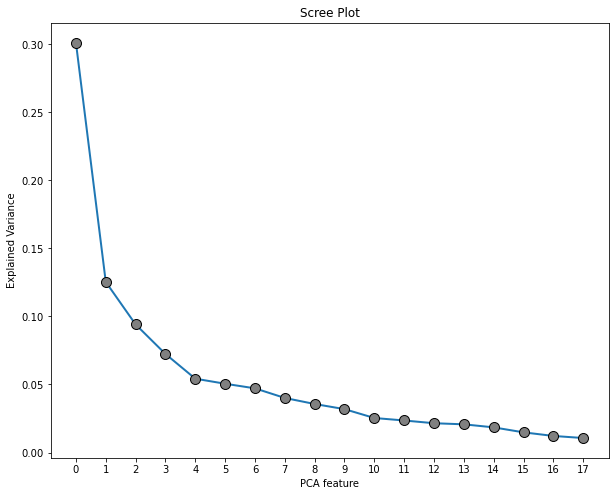

In [45]:
# calling the scree_plot function
scree_plot(pca_object = pca)

Re-create the PCA with 5 components after discussions with the team based on the scree plot. We try to focus on where the variances are stabilizing. 

In [46]:
# INSTANTIATING a PCA object with no limit to principal components
pca_5 = PCA(n_components = 5,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
hult_DNA_pca_5 = pca_5.fit_transform(hult_DNA_df)


# comparing dimensions of each DataFrame
print("Original shape:", hult_DNA_df.shape)
print("PCA shape     :", hult_DNA_pca_5.shape)

Original shape: (137, 18)
PCA shape     : (137, 5)


In [47]:
pd.DataFrame(hult_DNA_pca_5)

,0,1,2,3,4
0,-0.059294,-0.399082,0.071931,0.410957,-0.253023
1,-0.257926,-0.369998,-1.167389,-0.238584,0.720729
2,1.889151,-1.780606,0.376768,0.469952,-0.826114
3,-1.401220,2.562220,-0.847656,-1.308511,0.749191
4,3.399164,1.200859,-0.141344,-0.290348,-0.274836
5,2.018417,-0.180765,-0.343235,1.396886,-0.609941
6,-0.575439,0.818416,-0.492022,-0.647272,0.528604
7,-0.468634,-0.957249,0.651650,1.113972,-0.508543
8,0.582450,0.405608,1.544546,0.120126,0.312633
9,-1.927871,-0.347830,-1.173506,-0.392859,-0.588517


How our variances look like after fixing our components number.

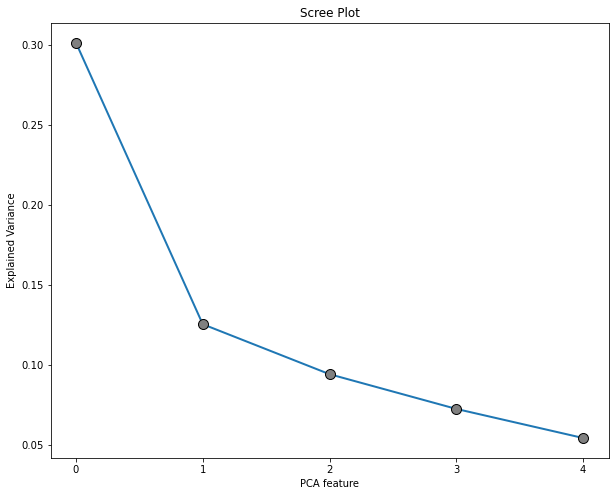

In [48]:
# calling the scree_plot function
scree_plot(pca_object = pca_5)

#### Analyze the PCA factor loadings
Here we are cross checking our components with our variables to decide on our personas.

In [49]:
# transposing pca components
hultDNA_factor_loadings_df = pd.DataFrame(pd.np.transpose(pca_5.components_))


# naming rows as original features
hultDNA_factor_loadings_df = hultDNA_factor_loadings_df.set_index(hult_DNA_df.columns)


# checking the result
print(hultDNA_factor_loadings_df)


# saving to Excel
hultDNA_factor_loadings_df.to_excel('hultDNA_factor_loadings.xlsx')

                                                                                   0         1         2         3         4
See underlying patterns in complex situations                              -0.239891  0.002319 -0.067687 -0.023539 -0.086391
Don't  generate ideas that are new and different                            0.159608  0.418596  0.770648 -0.274469  0.101349
Demonstrate an awareness of personal strengths and limitations             -0.220106  0.146612  0.085386 -0.016970 -0.111965
Display a growth mindset                                                   -0.252227 -0.019635 -0.126363 -0.131864  0.187723
Respond effectively to multiple priorities                                 -0.271111 -0.005658  0.112968 -0.134373 -0.294423
Take initiative even when circumstances, objectives, or rules aren't clear -0.322529  0.032502  0.068681 -0.258107 -0.362957
Encourage direct and open discussions                                      -0.286380 -0.053369 -0.003762 -0.302617  0.170116


/Users/takahashikazuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


#### Labeling Hult DNA Components
After having discussions using the factor loadings excel file, we agreed on the labels below. We picked a threshold value at 0.15, and analyze our factor loadings based on that value. We also used Hult DNA personality traits: Thinking, Team and Communication.

In [50]:
# naming each principal component
hultDNA_factor_loadings_df.columns = ['Slackers',               
                                      'Team Players',          
                                      'Solo Players', 
                                      'Action Seekers',            
                                      'System Seekers']        


# checking the result
hultDNA_factor_loadings_df

,Slackers,Team Players,Solo Players,Action Seekers,System Seekers
See underlying patterns in complex situations,-0.239891,0.002319,-0.067687,-0.023539,-0.086391
Don't generate ideas that are new and different,0.159608,0.418596,0.770648,-0.274469,0.101349
Demonstrate an awareness of personal strengths and limitations,-0.220106,0.146612,0.085386,-0.016970,-0.111965
Display a growth mindset,-0.252227,-0.019635,-0.126363,-0.131864,0.187723
Respond effectively to multiple priorities,-0.271111,-0.005658,0.112968,-0.134373,-0.294423
"Take initiative even when circumstances, objectives, or rules aren't clear",-0.322529,0.032502,0.068681,-0.258107,-0.362957
Encourage direct and open discussions,-0.286380,-0.053369,-0.003762,-0.302617,0.170116
Build cooperative relationships,-0.224167,0.151172,0.011886,0.074726,0.238961
Work well with people from diverse cultural backgrounds,-0.223332,0.111918,0.052378,0.159330,0.326390
Resolve conflicts constructively,-0.257603,0.150099,-0.038581,0.020080,0.103379


#### Student Level Personas
Here we are checing all our observations (students) with our persona selections.

In [51]:
# converting into a DataFrame 
hult_DNA_pca_5 = pd.DataFrame(hult_DNA_pca_5)


# renaming columns
hult_DNA_pca_5.columns = hultDNA_factor_loadings_df.columns


# checking results
hult_DNA_pca_5

,Slackers,Team Players,Solo Players,Action Seekers,System Seekers
0,-0.059294,-0.399082,0.071931,0.410957,-0.253023
1,-0.257926,-0.369998,-1.167389,-0.238584,0.720729
2,1.889151,-1.780606,0.376768,0.469952,-0.826114
3,-1.401220,2.562220,-0.847656,-1.308511,0.749191
4,3.399164,1.200859,-0.141344,-0.290348,-0.274836
5,2.018417,-0.180765,-0.343235,1.396886,-0.609941
6,-0.575439,0.818416,-0.492022,-0.647272,0.528604
7,-0.468634,-0.957249,0.651650,1.113972,-0.508543
8,0.582450,0.405608,1.544546,0.120126,0.312633
9,-1.927871,-0.347830,-1.173506,-0.392859,-0.588517


#### How our components stand based on our threshold value
Checking our personas with our threshold value to see if there is any that are not significant.

In [52]:
for val in hult_DNA_pca_5.columns:
    test = len(hult_DNA_pca_5[val][hult_DNA_pca_5[val] < - 0.15]) / \
    len(hult_DNA_pca_5) 
    print(f" {val} : {test}")
    

 Slackers : 0.5036496350364964
 Team Players : 0.48175182481751827
 Solo Players : 0.41605839416058393
 Action Seekers : 0.40145985401459855
 System Seekers : 0.4233576642335766


## Hult DNA - Clustering 

#### Variance amongst clusters

In [53]:
# checking variance amongst clusters
np.var(hult_DNA_pca_5)

Slackers          3.827673
Team Players      1.592896
Solo Players      1.196189
Action Seekers    0.920385
System Seekers    0.689449
dtype: float64

#### Prepare a scaled version of the factor loadings dataset
Before we cluster we need to ensure that the variances are consistent. In order to achieve that, 
we will need to rescale the PCA dataframe.

In [54]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_DNA_pca_5)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(hult_DNA_pca_5)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Slackers',                 
                      'Team Players ',          
                      'Solo Players',
                      'Action Seekers',
                      'System Seekers'] 


# checking pre- and post-scaling variance
print(pd.np.var(hult_DNA_pca_5), '\n\n')
print(pd.np.var(pca_scaled))

Slackers          3.827673
Team Players      1.592896
Solo Players      1.196189
Action Seekers    0.920385
System Seekers    0.689449
dtype: float64 


Slackers          1.0
Team Players      1.0
Solo Players      1.0
Action Seekers    1.0
System Seekers    1.0
dtype: float64


/Users/takahashikazuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/takahashikazuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


### Agglomerative Clustering

#### Develop a dendrogram to see how many clusters to build using k-Means
We are going to build an agglomerative clustering model. 

This will enable us to generate a dendrogram to better understand data groupings and help determine the final number of clusters to develop, and then to apply this number of clusters to a k-Means model.

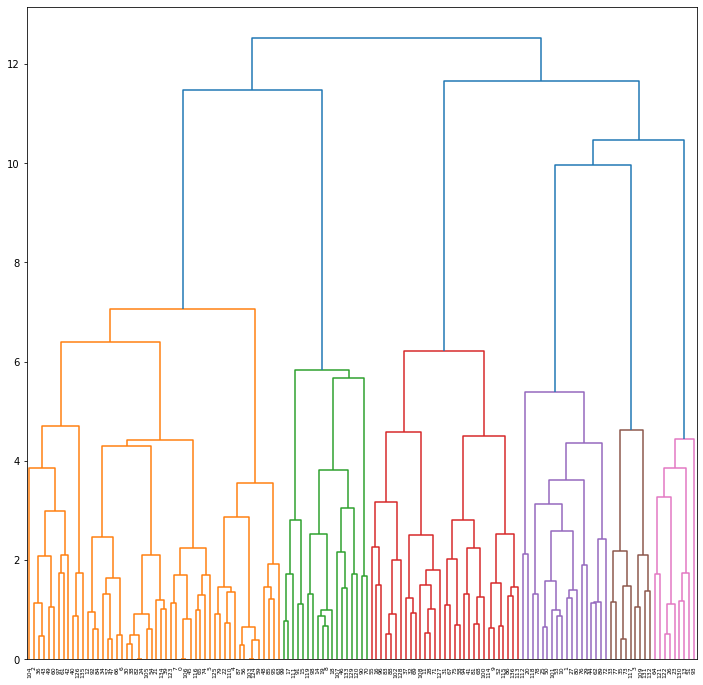

In [55]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./standard_hierarchical_clust_ward.png')
plt.show()

We create an inertia plot and look for the elbow cut off point where the numbers start to converge to determine the appropriate number of clusters for our analysis.

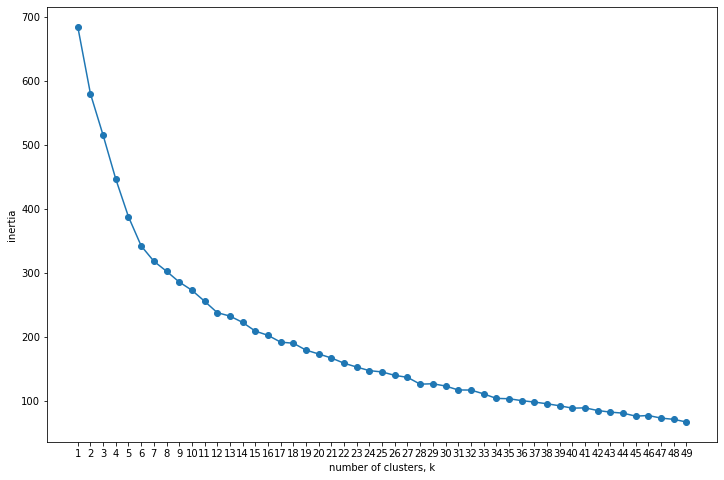

In [56]:
### analyzing the inertia plot

# calling the inertia_plot() function
interia_plot(data = pca_scaled)

#### Develop a k-Means model with clusters
Looking at the initial plot we see it converge around 7

In [57]:
# INSTANTIATING a k-Means object with 7 clusters
hultDNA_k_pca = KMeans(n_clusters   = 7,
                         random_state = 219)


# fitting the object to the data
hultDNA_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
hultDNA_kmeans_pca = pd.DataFrame({'Cluster': hultDNA_k_pca.labels_})

# checking the results

print("Number of participants in each cluster")
print("--------------------------------------")
print(hultDNA_kmeans_pca.iloc[: , 0].value_counts())

Number of participants in each cluster
--------------------------------------
1    32
3    24
0    21
5    18
6    15
2    15
4    12
Name: Cluster, dtype: int64


#### Display the centroids for each cluster
The centroids are the center of each cluster we have developed, with all the data points within the cluster centered around it. When finished, they will help us interpret the meaning of the clusters and develop back stories for ideal members of each group!

In [58]:
### centroids (mean values) for clusters

# storing cluster centers
centroids_pca = hultDNA_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Slackers',                 
                      'Team Players ',          
                      'Solo Players',
                      'Action Seekers',
                      'System Seekers'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Slackers,Team Players,Solo Players,Action Seekers,System Seekers
0,1.22,0.06,0.41,-0.64,-0.25
1,-0.84,-0.91,-0.11,0.20,-0.01
2,-0.56,1.07,-1.26,-1.06,0.10
3,0.42,-0.02,-0.37,0.36,1.31
4,-0.25,1.05,0.18,1.57,-0.69
5,0.55,-0.46,-0.42,0.12,-1.30
6,-0.49,0.52,1.87,-0.45,0.29


 #### Renaming Clusters

In [59]:
# Cluster
cluster = ['1', '2', '3', '4', '5', '6', '7']

# Assigning cluster object 
centroids_pca_df.index = cluster
centroids_pca_df.round(2)


,Slackers,Team Players,Solo Players,Action Seekers,System Seekers
1,1.22,0.06,0.41,-0.64,-0.25
2,-0.84,-0.91,-0.11,0.20,-0.01
3,-0.56,1.07,-1.26,-1.06,0.10
4,0.42,-0.02,-0.37,0.36,1.31
5,-0.25,1.05,0.18,1.57,-0.69
6,0.55,-0.46,-0.42,0.12,-1.30
7,-0.49,0.52,1.87,-0.45,0.29


#### Concatenate the demographics with the clusters
Here we are going to plug our demographics variable in for our further analysis.

In [60]:
# concatenating cluster memberships with principal components
clst_pca_2_df = pd.concat([hultDNA_kmeans_pca,
                         hult_DNA_pca_5],
                         axis = 1)


# checking results
clst_pca_2_df


# concatenating demographic information with pca-clusters
final_pca_clust_2_df = pd.concat([survey_df.loc[ : , [ 'What laptop do you currently have?',
                                                     'What laptop would you buy in next assuming if all laptops cost the same?',
                                                     'What program are you in?',
                                                     'Gender',
                                                     'What is your ethnicity?',
                                                     'World_Area',
                                                     'nationality',  
                                                     'Age_Group']],
                                        clst_pca_2_df],
                                        axis = 1)


# renaming columns
final_pca_clust_2_df.columns = ['Laptop Owned',
                              'Desired Laptop',
                              'Program',
                              'Gender',
                              'Ethnicity',
                              'Region',
                              'Nationality',
                              'Age Group',
                              'Cluster',
                              'Slackers',
                              'Team Players',
                              'Solo Players',
                              'Action Seekers',
                              'System Seekers']


# checking the results
final_pca_clust_2_df.head(n = 5)



,Laptop Owned,Desired Laptop,Program,Gender,Ethnicity,Region,Nationality,Age Group,Cluster,Slackers,Team Players,Solo Players,Action Seekers,System Seekers
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,Hispanic / Latino,Americas,Ecuadorian,GenY,1,-0.059294,-0.399082,0.071931,0.410957,-0.253023
1,Windows laptop,Windows laptop,One year Business Analytics,Male,Hispanic / Latino,Americas,Ecuadorian,GenY,3,-0.257926,-0.369998,-1.167389,-0.238584,0.720729
2,Windows laptop,Windows laptop,One year Business Analytics,Male,West Asian / Indian,Asia,Indian,GenY,5,1.889151,-1.780606,0.376768,0.469952,-0.826114
3,Windows laptop,Windows laptop,One year Business Analytics,Female,West Asian / Indian,Asia,Indian,GenY,2,-1.401220,2.562220,-0.847656,-1.308511,0.749191
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),Male,Far east Asian,Asia,Chinese,GenY,0,3.399164,1.200859,-0.141344,-0.290348,-0.274836


#### Renaming Clusters

In [61]:
# renaming Clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6',
                 6 : 'Cluster 7'}


final_pca_clust_2_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_2_df


# checking results
data_df

,Laptop Owned,Desired Laptop,Program,Gender,Ethnicity,Region,Nationality,Age Group,Cluster,Slackers,Team Players,Solo Players,Action Seekers,System Seekers
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,Hispanic / Latino,Americas,Ecuadorian,GenY,Cluster 2,-0.059294,-0.399082,0.071931,0.410957,-0.253023
1,Windows laptop,Windows laptop,One year Business Analytics,Male,Hispanic / Latino,Americas,Ecuadorian,GenY,Cluster 4,-0.257926,-0.369998,-1.167389,-0.238584,0.720729
2,Windows laptop,Windows laptop,One year Business Analytics,Male,West Asian / Indian,Asia,Indian,GenY,Cluster 6,1.889151,-1.780606,0.376768,0.469952,-0.826114
3,Windows laptop,Windows laptop,One year Business Analytics,Female,West Asian / Indian,Asia,Indian,GenY,Cluster 3,-1.401220,2.562220,-0.847656,-1.308511,0.749191
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),Male,Far east Asian,Asia,Chinese,GenY,Cluster 1,3.399164,1.200859,-0.141344,-0.290348,-0.274836
5,Macbook,Macbook,DD (MIB & Business Analytics),Male,West Asian / Indian,Asia,Indian,GenZ,Cluster 6,2.018417,-0.180765,-0.343235,1.396886,-0.609941
6,Windows laptop,Macbook,DD (MIB & Business Analytics),Female,Hispanic / Latino,Americas,Dominican,GenZ,Cluster 3,-0.575439,0.818416,-0.492022,-0.647272,0.528604
7,Windows laptop,Windows laptop,DD (MIB & Business Analytics),Female,White / Caucasian,Europe,Swiss,GenY,Cluster 2,-0.468634,-0.957249,0.651650,1.113972,-0.508543
8,Macbook,Macbook,DD (MBA & Business Analytics),Male,Far east Asian,Asia,Japanese,GenY,Cluster 7,0.582450,0.405608,1.544546,0.120126,0.312633
9,Windows laptop,Chromebook,DD (MBA & Business Analytics),Male,Hispanic / Latino,Americas,Costarrican,GenY,Cluster 2,-1.927871,-0.347830,-1.173506,-0.392859,-0.588517


## Analyze with Demographics

Here we are plotting students with their current laptop and desire laptop to see any variations between clusters. We picked "Action Seekers" for this part because it gave us more insights.

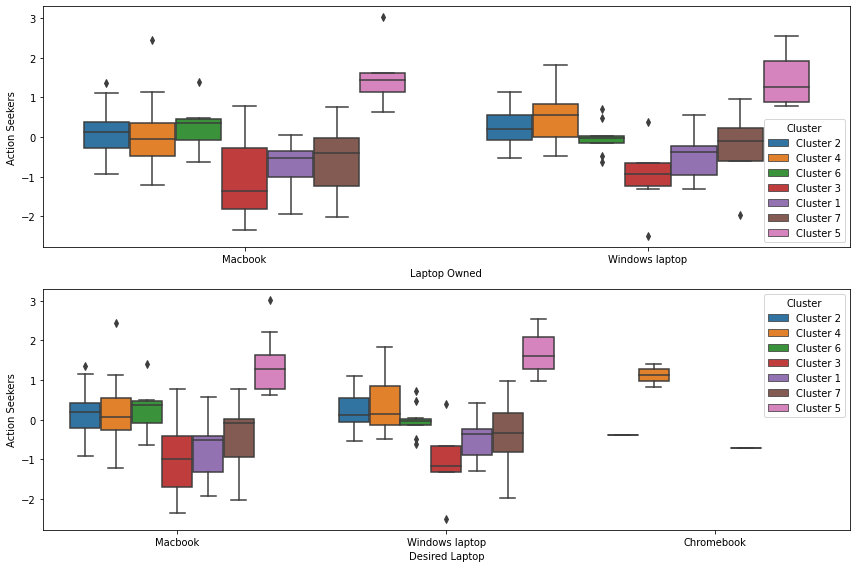

In [62]:
# Action Seekers
fig, ax = plt.subplots(figsize = (12, 8))
# Laptop Owned
plt.subplot(2, 1, 1)
sns.boxplot(x = 'Laptop Owned',
            y = 'Action Seekers',
            hue = 'Cluster',
            data = data_df)

# Desired Laptop
plt.subplot(2, 1, 2)
sns.boxplot(x = 'Desired Laptop',
            y = 'Action Seekers',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

#### Insigths Regarding Laptop Preference

Anlyzing the first boxplot above we realized that Cluster 3 and 4 have more Windows Laptos than Macbook. Looking at the second chart for the same clusters, we can see that there is an equal desire for Macbook for this clusters. So, even they owned Window, they would like to buy Macbook.

In the first plot, we can also see that cluster 6 and 7 own more Macbook than Windows. Second plot shows that  they keep their desire for Macbook still. We are going to look at demographics now to analyze these clusters more.

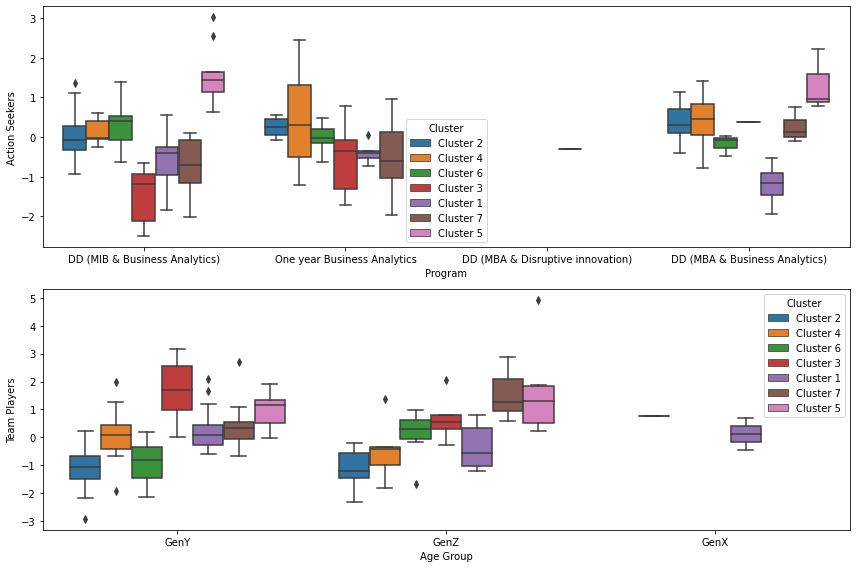

In [63]:
# Action Seekers
fig, ax = plt.subplots(figsize = (12, 8))

# Program
plt.subplot(2, 1, 1)
sns.boxplot(x = 'Program',
            y = 'Action Seekers',
            hue = 'Cluster',
            data = data_df)
# Age
plt.subplot(2, 1, 2)
sns.boxplot(x = 'Age Group',
            y = 'Team Players',
            hue = 'Cluster',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

#### More Insights with Demographics
Here for the degree programs we have the same trend as Big Five Analysis. Students doing only a technical degree tend to have more Windows. But here the difference is, these students are more close buying a Macbook. So we have much bigger potential here. Looking at their age group in the second plot, they are more GenY but also little bit of GenZ. So, that sould be taking into account when creating campaigns for these clusters.

Looking at cluster 6 and 7 - they are loyal macbook users - we can see in the second chart that they are more GenZ. This tells us they are much younger students. Apple should take this into consideration and maybe dig into more to discover what triggers younger students to buy more Macbook.